# Plotting 4

Learning objectives:
- Plot multi-column data using bar charts and stacked bar charts.
- Adjust figure axes (lower and upper limits, logarithm scales).
- Combine multiple plots (Axes objects) into one figure.
- Arrange the order of subplots within a figure.

In [1]:
# ignore this cell (it's just to make certain text red later, but you don't need to understand it).
from IPython.core.display import display, HTML
display(HTML('<style>em { color: red; }</style> <style>.container { width:100% !important; }</style>'))

In [2]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib
from matplotlib import pyplot as plt

In [3]:
matplotlib.rcParams["font.size"] = 16

In [4]:
import math
import requests

# Bar Plot Example w/ Fire Hydrants continuation

In [5]:
df = pd.read_csv("Fire_Hydrants.csv")
df.head()

,X,Y,OBJECTID,CreatedBy,CreatedDate,LastEditor,LastUpdate,FacilityID,DataSource,ProjectNumber,...,Elevation,Manufacturer,Style,year_manufactured,BarrelDiameter,SeatDiameter,Comments,nozzle_color,MaintainedBy,InstallType
0,-89.519573,43.049308,2536,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-2,FASB,NaN,...,1138.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
1,-89.521988,43.049193,2537,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-4,FASB,NaN,...,1170.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
2,-89.522093,43.048233,2538,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2361-19,FASB,NaN,...,1179.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
3,-89.521013,43.049033,2539,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-3,FASB,NaN,...,1163.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
4,-89.524782,43.056263,2540,NaN,NaN,WUPTB,2017-08-31T16:19:46.000Z,HYDR-2257-5,NaN,NaN,...,1065.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN


Text(0.5, 0, 'Hydrant count')

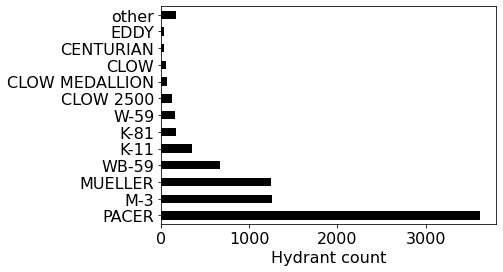

In [6]:
style_counts = df["Style"].str.upper().value_counts()
top12 = style_counts.iloc[:12]
top12["other"] = style_counts.iloc[12:].sum()
ax = top12.plot.barh(color="k")
ax.set_xlabel("Hydrant count")

### In what *decade* were *pacers manufactured*?
### Take a peek at the *Style* column data

In [7]:
print(df["Style"].head())
print(df["Style"].tail())

0    Pacer
1    Pacer
2    Pacer
3    Pacer
4    Pacer
Name: Style, dtype: object
10104    NaN
10105    NaN
10106    NaN
10107    NaN
10108    NaN
Name: Style, dtype: object


### Which *column* gives *year* information?

In [8]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'CreatedBy', 'CreatedDate', 'LastEditor',
       'LastUpdate', 'FacilityID', 'DataSource', 'ProjectNumber',
       'InstallDate', 'LifecycleStatus', 'Location', 'SymbolRotation',
       'HydrantType', 'Elevation', 'Manufacturer', 'Style',
       'year_manufactured', 'BarrelDiameter', 'SeatDiameter', 'Comments',
       'nozzle_color', 'MaintainedBy', 'InstallType'],
      dtype='object')

### How to get the *decade* for *pacers* and *others*?

In [9]:
print(df[["Style", "year_manufactured"]].head())
print(df[["Style", "year_manufactured"]].tail())

   Style  year_manufactured
0  Pacer             1996.0
1  Pacer             1995.0
2  Pacer             1996.0
3  Pacer             1995.0
4  Pacer             1996.0
      Style  year_manufactured
10104   NaN             2018.0
10105   NaN             2017.0
10106   NaN             2000.0
10107   NaN             2017.0
10108   NaN                NaN


In [12]:
pacer_years = df[df["Style"] == "Pacer"]["year_manufactured"]
other_years = df["year_manufactured"][df["Style"] != "Pacer"] #Note we were able to swap order
print(pacer_years.head())
print(other_years.head())

0    1996.0
1    1995.0
2    1996.0
3    1995.0
4    1996.0
Name: year_manufactured, dtype: float64
18    1987.0
22    1996.0
23    1996.0
71    1987.0
72    1987.0
Name: year_manufactured, dtype: float64


In [13]:
pacer_decades = (pacer_years // 10) * 10
pacer_decades.head()

0    1990.0
1    1990.0
2    1990.0
3    1990.0
4    1990.0
Name: year_manufactured, dtype: float64

### How to *count the decades* for pacers and others?

In [14]:
pacer_decades = ((pacer_years // 10) * 10).value_counts()
pacer_decades

2000.0    1730
1990.0     846
2010.0     503
1980.0      21
1960.0       1
Name: year_manufactured, dtype: int64

In [15]:
other_decades = ((other_years // 10) * 10).value_counts()
other_decades

2010.0    1196
1980.0     937
1970.0     578
1990.0     431
1950.0     371
1960.0     349
2000.0     215
1940.0      68
1930.0       9
1900.0       1
Name: year_manufactured, dtype: int64

### How to convert the *decades* back to *int*?

In [16]:
#This doesn't work! Because we have NaN entries in our pacer_years
pacer_decades = ((pacer_years // 10) * 10).astype(int).value_counts()
pacer_decades

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [17]:
clean_pacer_years = pacer_years.dropna() #Remove NaN rows
pacer_decades = ((clean_pacer_years // 10) * 10).astype(int).value_counts()
pacer_decades

2000    1730
1990     846
2010     503
1980      21
1960       1
Name: year_manufactured, dtype: int64

In [18]:
clean_other_years = other_years.dropna() #Remove NaN rows
other_decades = ((clean_other_years // 10) * 10).astype(int).value_counts()
other_decades

2010    1196
1980     937
1970     578
1990     431
1950     371
1960     349
2000     215
1940      68
1930       9
1900       1
Name: year_manufactured, dtype: int64

### How to put both the pacers and other decade counts Series together?

In [20]:
style_df = DataFrame({
    "pacer":pacer_decades,
    "other":other_decades
})
style_df

,pacer,other
1900,NaN,1
1930,NaN,9
1940,NaN,68
1950,NaN,371
1960,1.0,349
1970,NaN,578
1980,21.0,937
1990,846.0,431
2000,1730.0,215
2010,503.0,1196


### Create a *bar plot* for visualization

Text(0, 0.5, 'Hydrant Count')

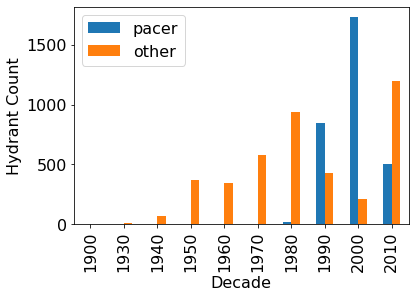

In [22]:
ax = style_df.plot.bar()
ax.set_xlabel("Decade")
ax.set_ylabel("Hydrant Count")

Text(0, 0.5, 'Hydrant Count')

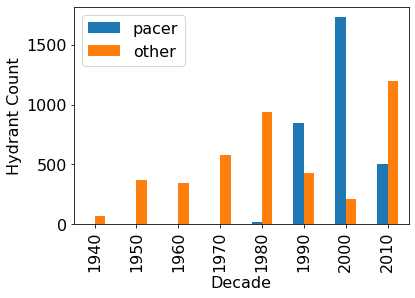

In [23]:
ax = style_df[style_df.index >= 1940].plot.bar()
ax.set_xlabel("Decade")
ax.set_ylabel("Hydrant Count")

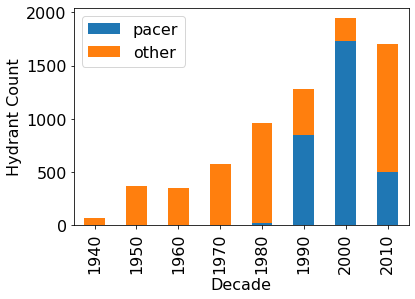

In [26]:
ax = style_df[style_df.index >= 1940].plot.bar(stacked=True) #stacked defaults to False
ax.set_xlabel("Decade")
ax.set_ylabel("Hydrant Count")
None #One way to remove the "Text(0, 0.5, 'Hydrant Count')" is to give the cell an actual return value
#Alternative is to use matplotlib.pyplot.show() #This is the direct way of forcing the figure to appear

# Rest of today's lecture
- setting axes limits
- logarithms
- multiple plots within same figure

## IRIS dataset: http://archive.ics.uci.edu/ml/datasets/iris

In [37]:
resp = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
resp.raise_for_status()

iris_fh = open("iris.data", "w")
iris_fh.write(resp.text)
iris_fh.close()

df = pd.read_csv("iris.data",
                 names = ["sep-len", "sep-wid", "pet-len", "pet-wid", "class"])
df.head()

,sep-len,sep-wid,pet-len,pet-wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
classes = set(df["class"])
classes

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

### How do we control the *axes range* of values?
### Let us consider plotting just the data for class "Iris-virginica"
### How to extract data just for "Iris-virginica"?

In [39]:
df_sub = df[df["class"] == "Iris-virginica"]
assert(len(df_sub) == 50)
df_sub.head()

,sep-len,sep-wid,pet-len,pet-wid,class
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


<AxesSubplot:xlabel='pet-wid', ylabel='pet-len'>

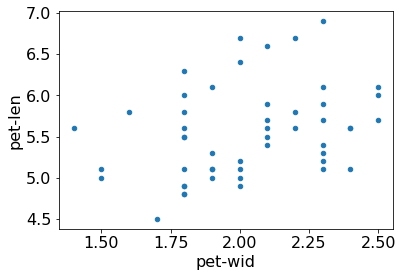

In [40]:
df_sub.plot.scatter(x = "pet-wid", y = "pet-len")

### Let's learn about *xlim* and *ylim*
- Allows us to set x-axis and y-axis limits
- Takes either a single value (LOWER-BOUND) or a tuple containing two values (LOWER-BOUND, UPPER-BOUND)
- You need to be careful about setting the UPPER-BOUND

<AxesSubplot:xlabel='pet-wid', ylabel='pet-len'>

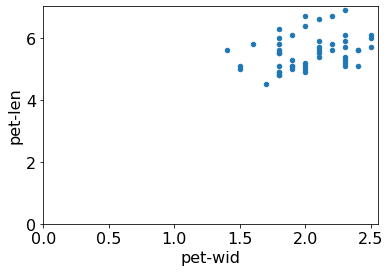

In [41]:
df_sub.plot.scatter(x = "pet-wid", y = "pet-len", xlim=0, ylim=0)

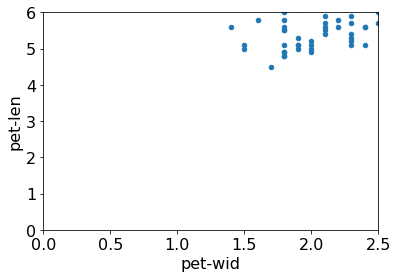

In [46]:
ax = df_sub.plot.scatter(x = "pet-wid", y = "pet-len", xlim=(0,2.5), ylim=(0,6))

<AxesSubplot:xlabel='pet-wid', ylabel='pet-len'>

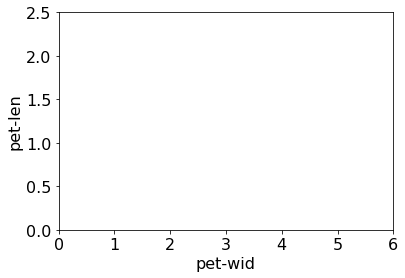

In [43]:
df_sub.plot.scatter(x = "pet-wid", y = "pet-len", xlim=(0,6), ylim=(0,2.5))

What's wrong with the above plot?

In [44]:
df_sub["pet-len"].max()

6.9

In [47]:
ax.get_ylim()

(0.0, 6.0)

Let's include assert statements to make sure we don't crop the plot!

AssertionError: 

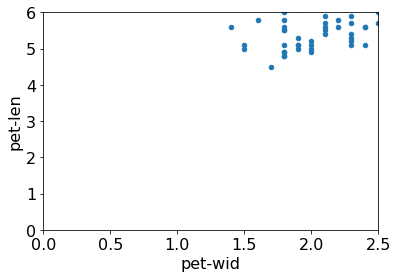

In [48]:
ax = df_sub.plot.scatter(x = "pet-wid", y = "pet-len", xlim=(0,2.5), ylim=(0,6))
assert df_sub["pet-len"].max() <= ax.get_ylim()[1]

### Now let's try all 4 assert statements

- assert df_sub[ax.get_xlabel()].min() >= ax.get_xlim()[0]
- assert df_sub[ax.get_xlabel()].max() <= ax.get_xlim()[1]
- assert df_sub[ax.get_ylabel()].min() >= ax.get_ylim()[0]
- assert df_sub[ax.get_ylabel()].max() <= ax.get_ylim()[1]

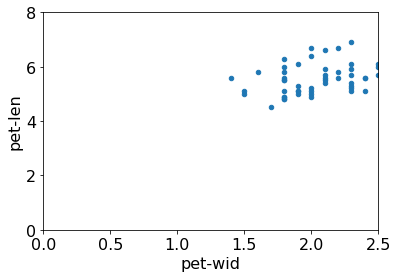

In [50]:
ax = df_sub.plot.scatter(x = "pet-wid", y = "pet-len", xlim=(0,2.5), ylim=(0,8))
assert df_sub["pet-len"].max() <= ax.get_ylim()[1]
assert df_sub["pet-len"].min() >= ax.get_ylim()[0]
assert df_sub["pet-wid"].max() <= ax.get_xlim()[1]
assert df_sub["pet-wid"].max() >= ax.get_xlim()[0]

### Logarithmic scale
- math.log(y, base)
- find an x, such that 10**x == y
    - math.log10(y)

In [56]:
math.log10(1000)

3.0

In [57]:
math.log(1000) #Defaults to the "natural log"

6.907755278982137

In [58]:
math.log(math.e)

1.0

Let's look at the error margin

### Why does this matter?
- Comparing two numbers:
     - 134234255623423423423432423432432432
     - 2342343252523

- Eventually I don't care what the number is, but only counting the number of digits in the number to know how big the number is!
- log base 2: counting how many bits we need
- log base 10: 10 digits 0 through 9!

<AxesSubplot:>

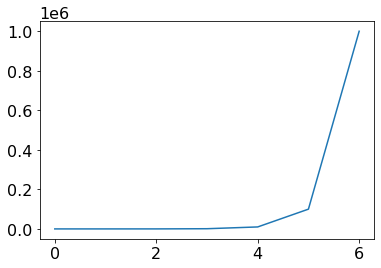

In [59]:
s = Series([1, 10, 100, 1000, 10000, 100000, 1000000])
s.plot.line()

<AxesSubplot:>

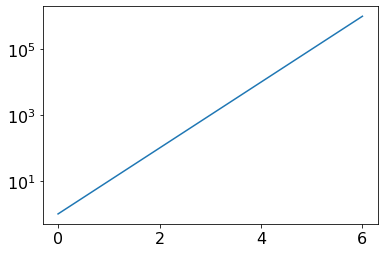

In [60]:
s.plot.line(logy=True) #can also logx

### Multiple *axessubplots* in the same plot

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

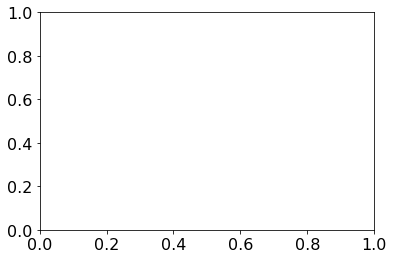

In [61]:
plt.subplots()

(<Figure size 432x288 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

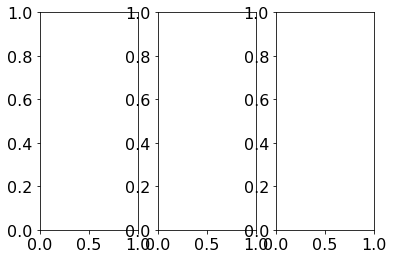

In [62]:
plt.subplots(ncols=3)

(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

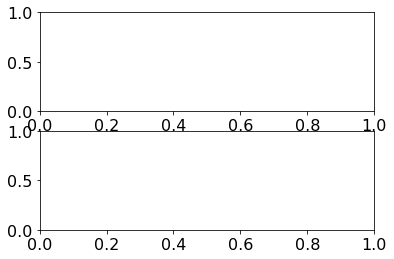

In [63]:
plt.subplots(nrows=2)

(<Figure size 432x288 with 4 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

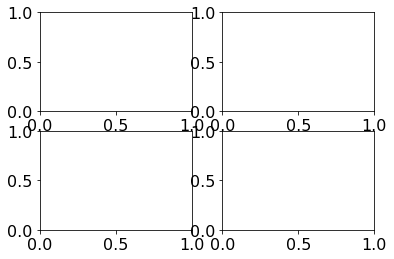

In [64]:
plt.subplots(nrows=2, ncols=2)

<AxesSubplot:>

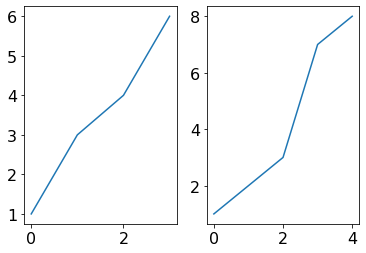

In [65]:
fig, axes = plt.subplots(ncols = 2)
Series([1,3,4,6]).plot.line(ax = axes[0]) # ax = tells us which subplot in the figure we are creating right now
Series([1,2,3,7,8]).plot.line(ax = axes[1])

<AxesSubplot:>

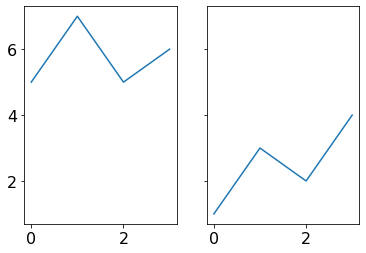

In [66]:
fig, axes = plt.subplots(ncols = 2, sharey=True) #Force sharing the same y scale and tick labels
Series([1,3,2,4]).plot.line(ax = axes[1])
Series([5,7,5,6]).plot.line(ax = axes[0])
#Can do the same with sharex

### That's all folks ...
### (for plotting topic)